GB1 Single mutation walk

In [1]:
%load_ext autoreload
%autoreload 2

from gb1_single_mutation_walk import main

In [2]:
start_variants, final_variants, fitness_progressions = main('all')

c:\Users\Matouš\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Save / Load results

In [3]:
import pickle
file_name = 'results.pkl'

In [4]:
with open(file_name, 'wb') as f:
    pickle.dump([start_variants, final_variants, fitness_progressions], f)

In [2]:
with open(file_name, 'rb') as f:
    start_variants, final_variants, fitness_progressions = pickle.load(f)

Plot learning curve

In [5]:
import matplotlib.pyplot as plt
from gb1_single_mutation_walk import WILD_TYPE_VARIANT

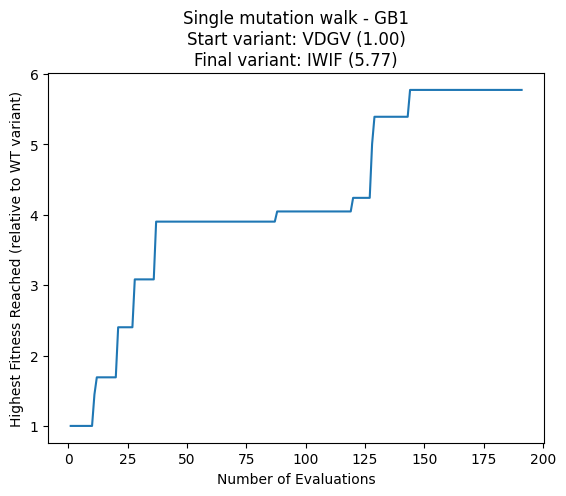

In [6]:
run_idx = start_variants.index(WILD_TYPE_VARIANT)

start_variant = start_variants[run_idx]
final_variant = final_variants[run_idx]
fitness_progression = fitness_progressions[run_idx]

n_evaluations = [i for i in range(1, len(fitness_progression)+1)]
plt.plot(n_evaluations, fitness_progression)
plt.xlabel('Number of Evaluations')
plt.ylabel('Highest Fitness Reached (relative to WT variant)')
start = 'Start variant: ' + start_variant + ' ({:.2f})'.format(fitness_progression[0])
finish = 'Final variant: ' + final_variant + ' ({:.2f})'.format(fitness_progression[-1])
plt.title('Single mutation walk - GB1\n' + start + '\n' + finish)
plt.show()

# Note: In practice, 570 variants have to be screened
#       570 = (4 + 3 + 2 + 1)[alg] * 19[aa] * 3[oversampling, 95% coverage]